 
#  <font color='darkblue'> Bayesian Learning (732A73) Lab 1</font> 



<center><font color='brown'>Hoda Fakharzadehjahromy (hodfa840),  Ravinder Alta (ravat601)</font></center>

# Assisgnment 1

## Daniel Bernoulli

In [37]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=6, repr.plot.height=4)

### Bernoulli ...again.

Let  $y_{1},...,y_{n}|\theta\sim\mathrm{Bern}(\theta)$  and assume that you have obtained a sample with $s=8$ successes in $n=24$  trials.
 Assume a $\mathrm{Beta}(\alpha_{0},\beta_{0})$ prior for  $\theta$ and let $\alpha_{0}=\beta_{0}=3$


*(a )Draw random numbers from the posterior $\theta\vert y\sim\mathrm{Beta}(\alpha_{0}+s,\beta_{0}+f)$, where
$y=(y_{1},\dots,y_{n}),$; and verify graphically that the posterior mean and standard
deviation converges to the true values as the number of random draws grows
large.*

*(b) Use simulation (nDraws = 10000) to compute the posterior probability* $\mathrm{Pr}(\theta<0.4\vert y)$ *and compare with the exact value.*

*(c) Compute the posterior distribution of the log-odds $\phi=\log\frac{\theta}{1-\theta}$  (nDraws = 10000)*

### (a)

True mean for $Beta(\alpha,\beta)$ is:
$$ E[\theta] = \frac{\alpha}{\alpha + \beta} $$ 
True $\sigma^2$ for $Beta(\alpha,\beta)$ is:
$$ \sigma^2(\theta) =\frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$$
The prior function for this problem is:
$$p(\theta) \propto \theta ^{{\alpha_0} - 1}(1-\theta^{{\beta_0} - 1})$$

The likelihood function is :
$$ p(y_1,...,y_n | \theta) \propto \prod_{i=1}^n p(y_i | \theta) = \prod_{i=1}^n \theta^{y_i} (1 - \theta)^{1 - y_i}=\theta^s (1 - \theta)^f$$

posterior is :

posterior
$$ p(\theta | y) \propto Beta (\alpha_0 + s, \beta_0 + f ) = Beta (11,19) $$ 



In [38]:
s = 8
n = 24
f = 16
alpha_0 = beta_0 = 3


In [39]:
NDraws = 10000
res = matrix(,NDraws,3)
colnames(res) = c("iter","mean","sd")
alpha_n=alpha_0+s
beta_n = beta_0+f
TrueMean = (alpha_n)/(alpha_n+beta_n)
TrueVar = sqrt((alpha_n*beta_n)/((alpha_n+beta_n)^2*(alpha_n+beta_n+1)))
TrueMean
TrueVar

[1] 0.3666667

[1] 0.08655079

In [40]:
PostB <- function(alpha= alpha_n,beta =beta_n ,n=NDraws){
    set.seed(43)

    for(i in 1:n){
        postB = rbeta(i,alpha,beta)
        res[i,] = c(i,mean(postB),sd(postB))

    }
    
    return(list(post=postB,mean_sd=res))
}
Posterior = PostB()

In [41]:
Posterior$mean_sd[1,3]=0
head(Posterior$mean_sd)

iter,mean,sd
1,0.3629400,0.00000000
2,0.2669733,0.07396499
3,0.3443858,0.06782267
4,0.3124737,0.09665964
5,0.4286403,0.13712276
6,0.3704016,0.11454616


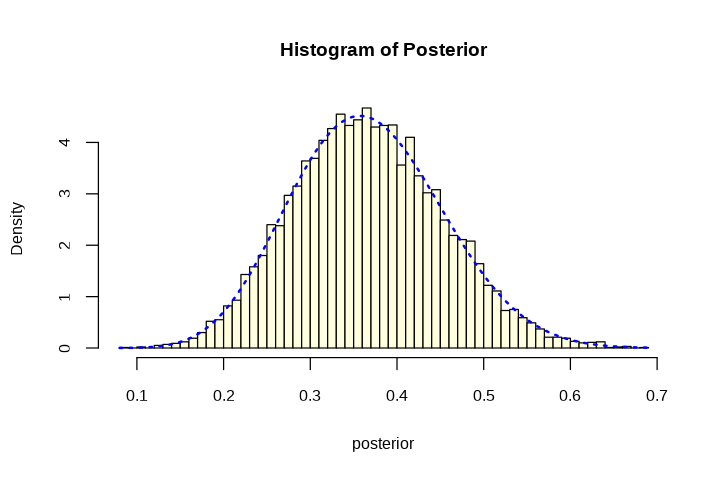

In [42]:
x <-seq( from =-5, to =10 , by =0.001)
hist(Posterior$post,col='lightyellow',freq = FALSE,breaks=50,xlab='posterior',main='Histogram of Posterior')
curve(dbeta(x,alpha_n,beta_n),add=TRUE,col='blue', lwd =2,lty=3)


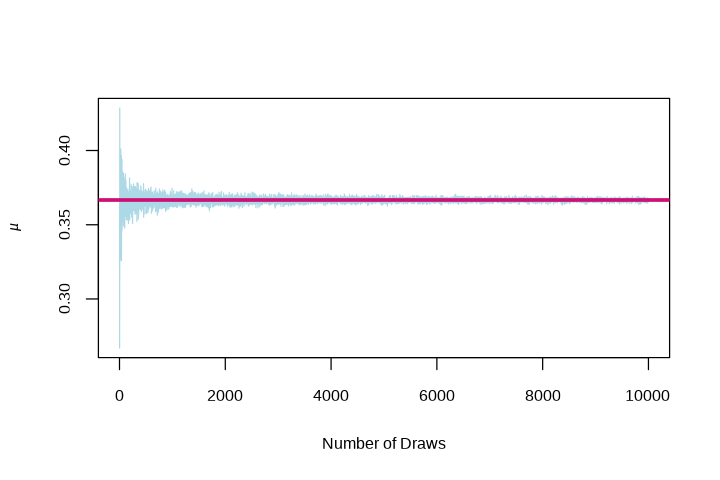

In [43]:
plot(x=1:NDraws,y=Posterior$mean_sd[,2],col='lightblue',lwd =1,type='l',xlab="Number of Draws",ylab=expression(mu))
abline(h=TrueMean,col='deeppink3',lwd=3)

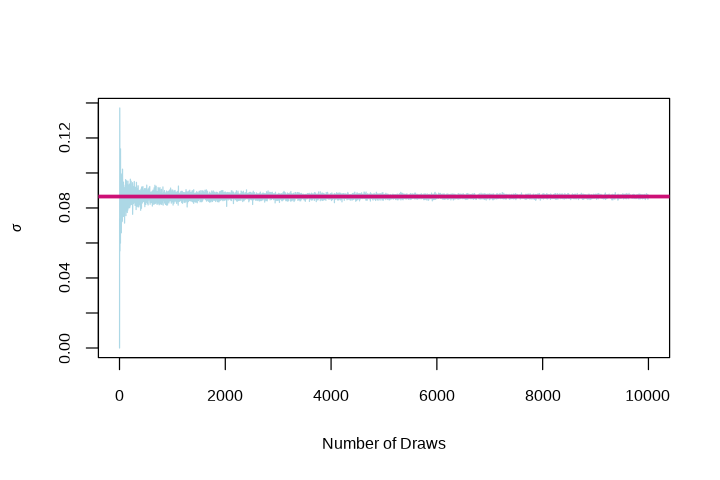

In [44]:
plot(x=1:NDraws,y=Posterior$mean_sd[,3],col='lightblue',lwd =1,type='l',xlab="Number of Draws",ylab=expression(sigma))
abline(h=TrueVar,col='deeppink3',lwd=3)

As we can see from the two plots above, as the number of draws increases, both $\mu$ and
$\sigma$ converge to the true values.

### (b)

we can see that our estimation of $Pr(\theta > 0.4 | y)$ is very close to true theoratical value. 


In [45]:

exact_prb =1- pbeta(0.4,alpha_n,beta_n)
pos_prob = length(Posterior$post[Posterior$post > 0.4])/length(Posterior$post)
prb = data.frame(exact_prb,pos_prob)
colnames(prb) = c('excact_prob',"simulated_value")
prb


excact_prob,simulated_value
0.3426654,0.3402


### (C)
Histogram and kernel density of of the data simulated from the posterior distribution of
the $\phi = log(\theta \ (1-\theta))$ with 10000 draws.

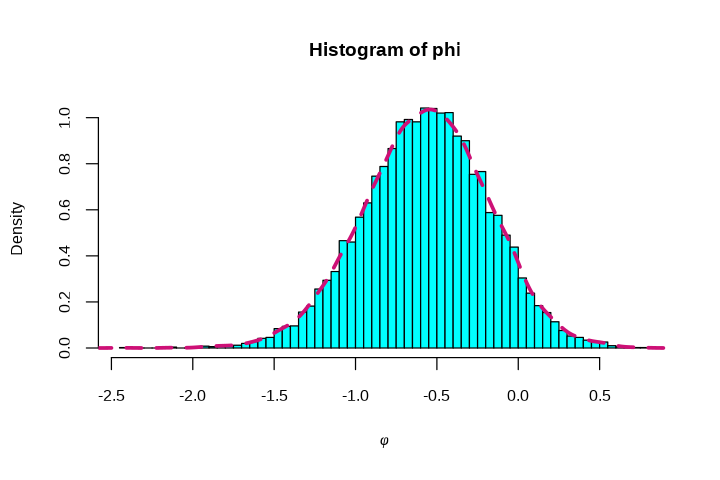

In [46]:
phi = log(Posterior$post/(1- Posterior$post))
hist(phi,breaks=100,probability = TRUE,col='cyan',xlab=expression(phi))
lines(density(phi),col='deeppink3',lty=2,lwd=3)

# Assignment 2

## Log-normal distribution and the Gini coefficient.


Assume that you have asked 10 randomly selected persons about their monthly
 income (in thousands Swedish Krona) and obtained the following ten observations
: 14, 25, 45, 25, 30, 33, 19, 50, 34 and 67.
 A common model for non-negative continuous variables is the log-normal
 distribution.
 The log-normal distribution 
 $\log\mathcal{N}(\mu,\sigma^{2})$


 has density function

$$ p(y|\mu ,{\sigma ^2}) = \frac{1}{{y\cdot\sqrt {2\pi {\sigma ^2}} }}\exp ( - \frac{1}{{2{\sigma ^2}}}{\left( {\log y - \mu } \right)^2}) $$ where 
 $y>0$ , $\mu>0$ and  $\sigma^{2}>0$

The log-normal distribution is related to the normal distribution as follows: $y\sim\log\mathcal{N}(\mu,\sigma^{2})$ then

$\log y\sim\mathcal{N}(\mu,\sigma^{2})$
 Let 
$y_{1},...,y_{n}\vert\mu,\sigma^{2}\overset{iid}{\sim}\log\mathcal{N}(\mu,\sigma^{2})$
, where 
 $\mu=3.8$


 is assumed to be known but 
$\sigma^{2}$ is unknown with non-informative prior  $p(\sigma^{2})\propto1/\sigma^{2}$ The posterior for 
$\sigma^{2}$  is the 
$Inv-\chi^{2}(n,\tau^{2})$


 distribution, where

$$ \tau^{2}=\frac{\sum_{i=1}^{n}(\log y_{i}-\mu)^{2}}{n}.$$





### (a)

*Simulate 10, 000 draws from the posterior of σ2 (assuming μ = 3.8) and com-
pare it with the theoretical Inv − χ2(n, τ 2) posterior distribution.*

In [47]:
num_draws = 10000 #sample size
mu = 3.8
observ = c(38,20, 49, 58, 31, 70, 18, 56, 25,78)
n_obser = length(observ)


In [48]:
tau2 = function(data,mu,n_obser){
    sum((log(data) -mu)^2 )/n_obser
}

In [49]:
tau2(observ,mu,n_obser )

[1] 0.2610437

In [50]:
rinvchisq <- function(num_draws, n_obser, tau_sq){
  set.seed(1234)
  x <- rchisq(num_draws,df = n_obser-1)
  x_inv <- ((n_obser-1)*tau_sq)/x
  return(x_inv)
}

In [51]:
post_sigma2 <- function(m){
    set.seed(12345)
    rinvchisq(num_draws = num_draws,n_obser = n_obser,tau_sq = tau2(observ,mu,n_obser=n_obser))
}

In [52]:
dinvchisq <- function(x,n_obser,tau_sq){
  res <- (((tau_sq*(n_obser-1))/2)^(n_obser-1)/2 * exp(-(tau_sq*(n_obser-1))/(2*x)))/((x^(1+(n_obser-1)/2)) * gamma((n_obser-1)/2))
  return(res)
}

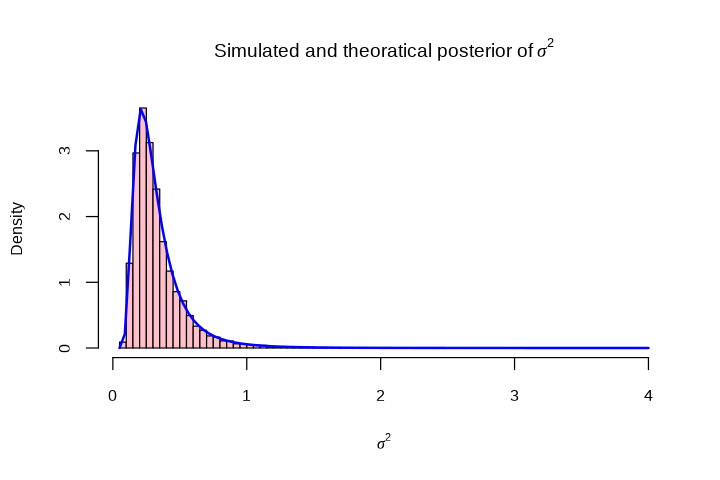

In [53]:
x <-seq( from =0, to =10 , by =0.001)
hist(post_sigma2(m = num_draws ),probability = TRUE,col='pink',breaks = 100,
     main=expression(paste('Simulated and theoratical posterior of ', sigma^2) ),
    ,xlab = expression(paste(sigma ^2)))
    curve(dinvchisq(x ,n_obser= n_obser,tau_sq = tau2(observ,mu,n_obser )),add=TRUE,col='blue',lwd=2)

### (b)
*The most common measure of income inequality is the Gini coeffcient, G,
where 0 < G < 1. $G=0$ means a completely equal income distribution,
whereas $G=1$ means complete income inequality (see Wikipedia for more
information about the Gini coeffcient). It can be shown that  $G=2\Phi\left(\sigma/\sqrt{2}\right)-1$
 when incomes follow a  $\log\mathcal{N}(\mu,\sigma^{2})$ distribution.$\Phi(z)$ is the cumulative
distribution function (CDF) for the standard normal distribution with mean
zero and unit variance. Use the posterior draws in a) to compute the posterior
distribution of the Gini coeffcient G for the current data set*

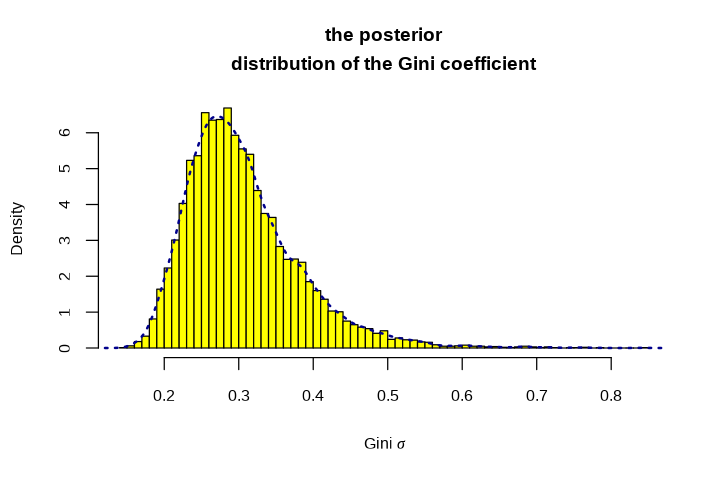

In [54]:
sigma2 = post_sigma2(m)
g_sigma = sqrt(sigma2)/sqrt(2) 
gpdf =2* pnorm(q = g_sigma,mean = 0,sd = 1)-1
hist(gpdf,probability = TRUE,col='yellow',breaks=50,main='the posterior
distribution of the Gini coefficient',xlab=expression(paste('Gini ', sigma)))
lines(density(gpdf),col='darkblue',lty=3,lwd=2)

### (c) 
*Use the posterior draws from b) to compute a 90% equal tail credible interval
for G. A 90% equal tail interval (a; b) cuts off 5% percent of the posterior
probability mass to the left of a, and 5% to the right of b. Also, do a kernel
density estimate of the posterior of G using the density function in R with
default settings, and use that kernel density estimate to compute a 90% Highest
Posterior Density Interval (HPDI) for G. Compare the two intervals.*


In [55]:
alpha_conf = 0.1
q_lower = quantile(gpdf,alpha_conf/2)
q_upper = quantile(gpdf,1-alpha_conf/2)
c(q_lower, q_upper)
true_mean = mean(gpdf)


5%       95% 
0.2088221 0.4456278

In [56]:
true_mean

[1] 0.3054866

HPD: shortest possible interval that under the posterior has the siginificance probability (ie. 0.9)

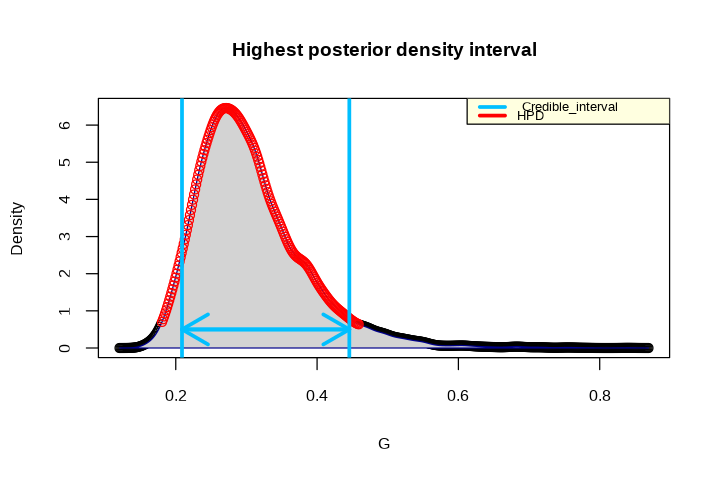

In [73]:
dD=density(gpdf)
dn=sort(dD$y/sum(dD$y),index.return=TRUE);
dnn = cumsum(dn$x)
HPDind = sort(dn$ix[dnn > .05])
notHPDind = sort(dn$ix[dnn <= .05])
plot(dD$x[notHPDind],dD$y[notHPDind],xlim=c(min(dD$x),max(dD$x)), 
     ylim=c(min(dD$y),max(dD$y)),title("Highest posterior density interval"),xlab="G",ylab="Density")
polygon(x=dD$x,y=dD$y, col = 'lightgrey',border = 'darkblue')

points(dD$x[HPDind],dD$y[HPDind],col=2)
segments(x0 =q_lower,y0 =0.5,x1 =q_upper,y1 =  0.5,col='deepskyblue1' ,lwd=3)
abline(v=q_lower,col='deepskyblue1' ,lwd=3)
abline(v=q_upper,col='deepskyblue1' ,lwd=3)
arrows(x0 =q_lower,y0 =0.5,x1 =q_upper,y1 =  0.5,col='deepskyblue1' ,lwd=3,code = 3)

legend("topright", 
  legend = c(" Credible_interval", "HPD"), 
  col = c('deepskyblue1','red'), lty=c(1,1,2), cex=0.8,lwd=3,bg='lightyellow')
                

we will use the cumulative sum of kernel density values to find the shortest interval in data that contains 0.9 of the data. 
the reason we can use cumulative to find HPD interval is because our data is unimodal.

# Assignment 3

## Bayesian inference for the concentration parameter in the von Mises distribution

distributions for circular data we convert the data into radians  . The
10 observations in radians are

$$(−2.44, 2.14, 2.54, 1.83, 2.02, 2.33, −2.79, 2.23, 2.07, 2.02).$$

Assume that these data points are independent observations following the von Mises
distribution

$$p(y\vert\mu,\kappa)=\frac{\exp\left[\kappa\cdot\cos(y-\mu)\right]}{2\pi I_{0}(\kappa)},\;-\pi\leq y\leq\pi,$$

where $I_{0}(\kappa)$ is the modified Bessel function of the first kind of order zero.The parameter $-\pi\leq\mu\leq\pi$ is the mean direction and κ > 0 is
called the concentration parameter. Large  $\kappa$ gives a small variance around $\mu$, and
vice versa. Assume that $\mu$ is known to be 2.39. Let $\kappa\sim\mathrm{Exponential}(\lambda=1)$ a
priori, where  $\lambda$ is the rate parameter of the exponential distribution (so that the
    mean is $1/\lambda$).

(a) Plot the posterior distribution of $\kappa$ for the wind direction data over a fine grid
of $\kappa$ values.

(b) Find the (approximate) posterior mode of $\kappa$ from the information in a).


_____________________________________________________________________

### (a) Posterior :
$$p(\kappa \mid y_1,y_2,...,y_n) \propto p(y_1,y_2,..., y_n \mid \kappa) \cdot p(\kappa)$$

$$p(\kappa \mid y_1,y_2,...,y_n) \propto \left[\frac{1}{I_0(\kappa)}\right]^n \cdot \exp\left[\sum_{i=1}^{n} \kappa \cdot cos(y_i - \mu)-\lambda \kappa\right]$$

$$p(\kappa \mid y_1,y_2,...,y_n) \propto \left[\frac{1}{I_0(\kappa)}\right]^n \cdot \exp\left[\sum_{i=1}^{n} \kappa \cdot cos(y_i - 2.39)-\kappa\right]$$



In [25]:
y_data =c(-2.44, 2.14, 2.54, 1.83, 2.02, 2.33, -2.79, 2.23, 2.07, 2.02)

In [26]:
n =length(y_data)
mu = 2.39
n

[1] 10

In [27]:
# a function to compute prior for k (exponential with lambda = 1)
prior_k <- function(k){
    dexp(x = k,rate = 1)
}

In [28]:
likelikood_k <- function(y,mu ,n,k){
    
    exp(k*sum(cos(y-mu)))/((2*pi*besselI(k,nu = 0))^n)
}

In [29]:
k= seq(from = 0,to = 20,by = 0.01)

In [30]:
#
posterior_k <- function(y=y_data,mu=mu ,n=n,k=k){
    likelikood_k(y,mu ,n,k )*prior_k(k)
}


In [31]:
post=posterior_k(y=y_data,mu=mu ,n=n,k=k)

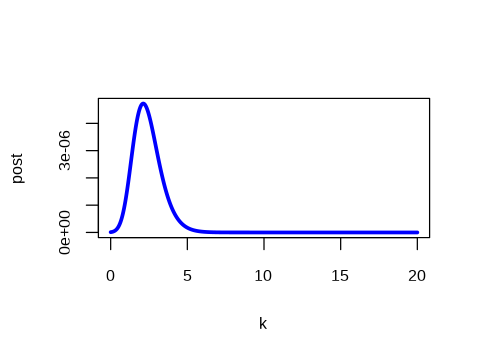

In [32]:
plot(y=post,x=k,col='blue',type='l',lwd=3)


### (b) Mode

In [33]:
k[which.max(post)]

[1] 2.12

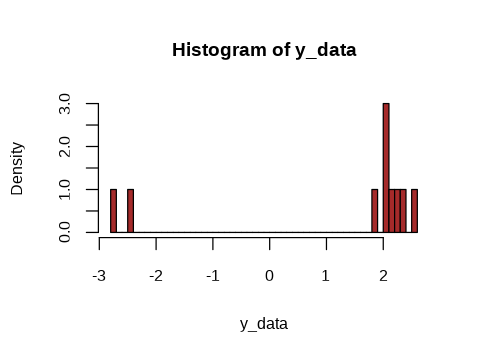

In [34]:
hist(y_data,probability = TRUE,breaks = 50,col='brown')

from the plot above we can see that $\kappa = 2.12$ is the actual mode of our data.

In [35]:
y_data[which(y_data<0)]

[1] -2.44 -2.79